# Import

## Modules

In [1]:
%matplotlib inline
import pymc3 as pm
from pymc3.ode import DifferentialEquation
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import arviz as az
import theano

plt.style.use('seaborn-darkgrid')

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


# Model

In [2]:
def SIR(y, t, p):
    ds = -p[0]*y[0]*y[1]
    di = p[0]*y[0]*y[1] - p[1]*y[1]
    return [ds, di]

In [3]:
sir_model = DifferentialEquation(
    func=SIR,
    times=np.arange(0.25, 5, 0.25),
    n_states=2,
    n_theta=2,
    t0=0,
)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '1650' (I am process '1778')


In [4]:
times = np.arange(0,5,0.25)

beta,lam = 4,1.0
# Create true curves
y = odeint(SIR, t=times, y0=[0.99, 0.01], args=((beta,lam),), rtol=1e-8)
# Observational model.  Lognormal likelihood isn't appropriate, but we'll do it anyway
yobs = np.random.lognormal(mean=np.log(y[1::]), sigma=[0.2, 0.3])

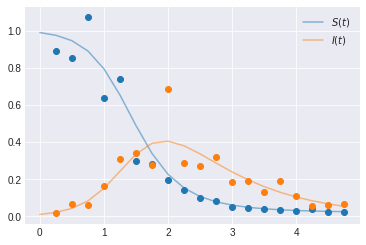

In [5]:
plt.plot(times[1::],yobs, marker='o', linestyle='none')
plt.plot(times, y[:,0], color='C0', alpha=0.5, label=f'$S(t)$')
plt.plot(times, y[:,1], color ='C1', alpha=0.5, label=f'$I(t)$')
plt.legend()
plt.show()

In [6]:
with pm.Model() as model4:
    sigma = pm.HalfCauchy('sigma', 1, shape=2)

    # R0 is bounded below by 1 because we see an epidemic has occured
    R0 = pm.Bound(pm.Normal, lower=1)('R0', 2,3)
    lam = pm.Lognormal('lambda',pm.math.log(2),2)
    beta = pm.Deterministic('beta', lam*R0)

    sir_curves = sir_model(y0=[0.99, 0.01], theta=[beta, lam])

    Y = pm.Lognormal('Y', mu=pm.math.log(sir_curves), sd=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample(100,tune=100, target_accept=0.9, cores=1)
    posterior_predictive = pm.sample_posterior_predictive(trace)

    data = az.from_pymc3(trace=trace, prior = prior, posterior_predictive = posterior_predictive)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [lambda, R0, sigma]
Sampling chain 1, 0 divergences: 100%|██████████| 200/200 [04:59<00:00,  1.50s/it]
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 200/200 [00:13<00:00, 14.68it/s]


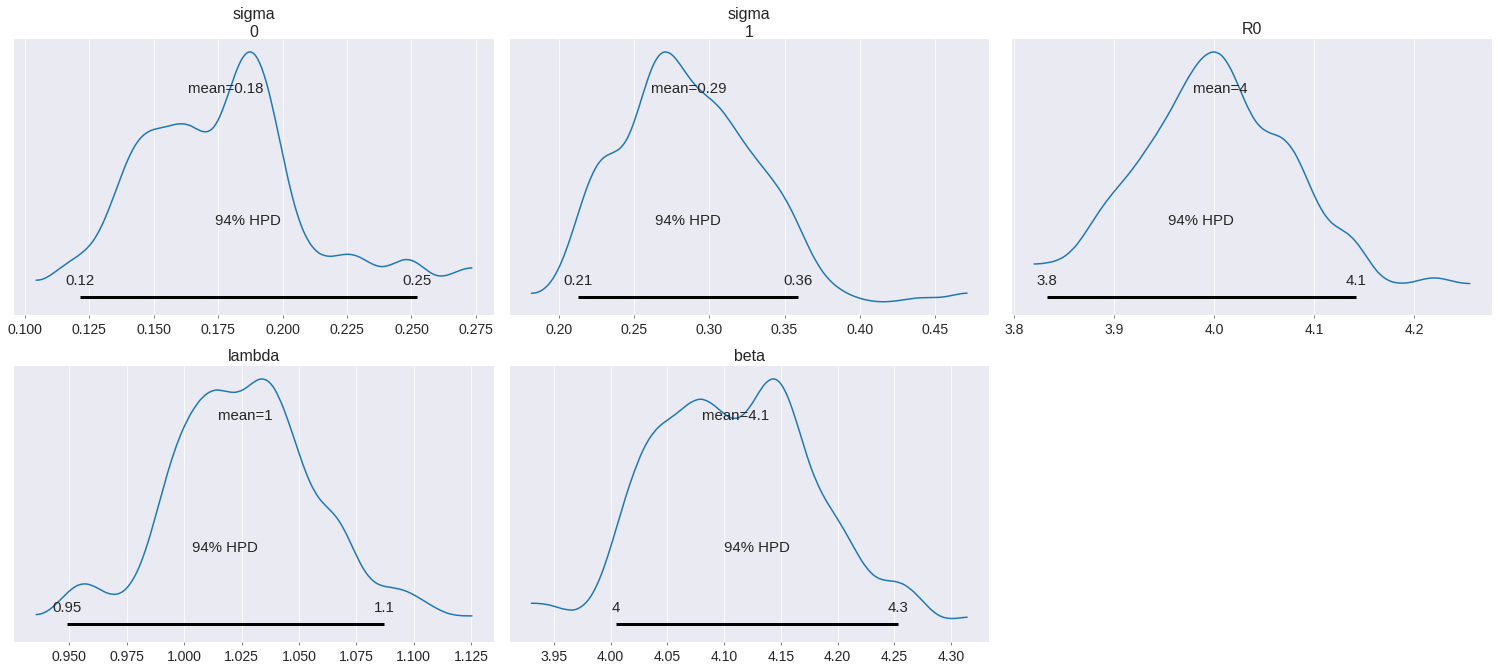

In [40]:
az.plot_posterior(data);

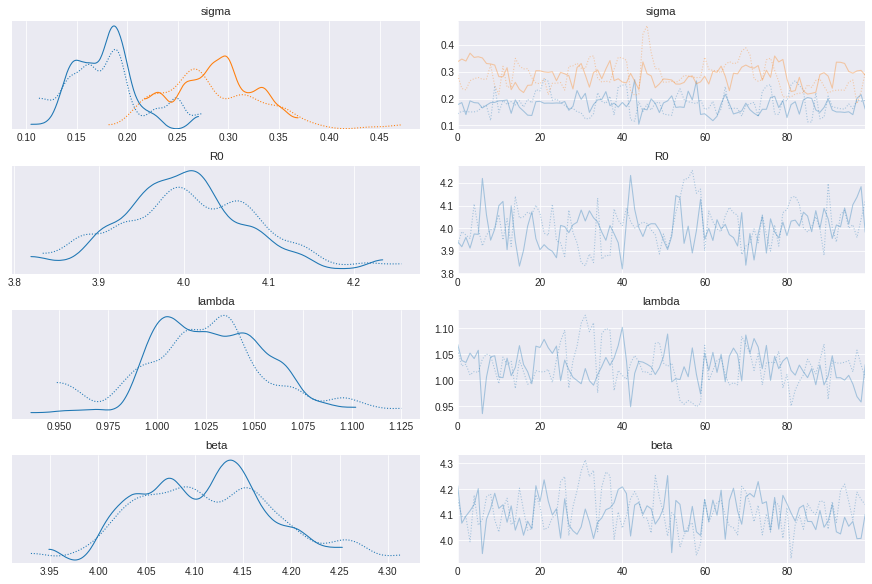

In [39]:
pm.plots.traceplot(data);

In [89]:
len(times)

20

ValueError: x and y must have same first dimension, but have shapes (20,) and (200,)

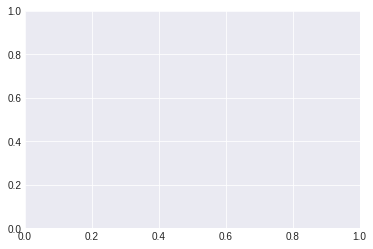

In [87]:
for index in range(len(posterior_predictive["Y"])):
    posterior = posterior_predictive["Y"][:, index]
    plt.plot(times, posterior[:, 0])

In [78]:
len(posterior_predictive["Y"])

200

In [83]:
posterior_predictive["Y"][:, 0][:, 1]

array([0.35297386, 0.29474619, 0.19391956, 0.36618788, 0.25214052,
       0.21636023, 0.30041383, 0.19188542, 0.16504946, 0.18650576,
       0.16297543, 0.2968116 , 0.2229371 , 0.23263637, 0.23944576,
       0.23152682, 0.23276413, 0.22598832, 0.38403036, 0.17352044,
       0.44184334, 0.19955176, 0.15953551, 0.23799141, 0.18203408,
       0.26398103, 0.19508449, 0.19675293, 0.21967219, 0.20623653,
       0.2621999 , 0.21240067, 0.16650837, 0.4989497 , 0.2217865 ,
       0.15007417, 0.20702389, 0.17137431, 0.29463207, 0.2267348 ,
       0.14544161, 0.29904948, 0.17824527, 0.53335812, 0.18612966,
       0.28812527, 0.38524736, 0.27937347, 0.16912854, 0.20981026,
       0.16915418, 0.21369651, 0.31750873, 0.22135832, 0.27495651,
       0.15240961, 0.35750055, 0.20374162, 0.21837805, 0.24565603,
       0.24187187, 0.33828322, 0.18963978, 0.27946292, 0.35026221,
       0.16947895, 0.30612591, 0.25607059, 0.30491637, 0.25077345,
       0.30195435, 0.26504951, 0.23724343, 0.3043631 , 0.23135

# References

* [Pymc3](https://docs.pymc.io/notebooks/ODE_API_introduction.html)

In [49]:
def home():
    client = coreapi.Client()
    data = client.get('https://brasil.io/api/dataset/covid19')

    name = data.get("name")
    age = data.get("age")
    gender = data.get("gender")
    user = UserReceived.objects.create(name=name, age=age, gender=gender)
    user.save()

    return HttpResponse(f"OKAY, got and saved user {name}"), data

In [ ]:
url = 'https://api.digitalocean.com/v2/droplets'
    r = requests.get(url, headers={'Authorization':'Bearer %s' % 'access_token'})
    droplets = r.json()
    droplet_list = []
    for i in range(len(droplets['droplets'])):
        droplet_list.append(droplets['droplets'][i])
    return droplet_list

In [65]:
import requests
url = 'https://brasil.io/api/dataset/covid19/caso/data'
r = requests.get(url)

  

In [69]:
import pandas as pd
pd.DataFrame.from_dict(r.json().get("results"))


,city,city_ibge_code,confirmed,confirmed_per_100k_inhabitants,date,death_rate,deaths,estimated_population_2019,is_last,order_for_place,place_type,state
0,Acrelândia,1200013,9,58.99318,2020-04-06,NaN,0.0,15256.0,True,9,city,AC
1,Plácido de Castro,1200385,1,5.06047,2020-04-06,NaN,0.0,19761.0,True,1,city,AC
2,Porto Acre,1200807,1,5.40424,2020-04-06,NaN,0.0,18504.0,True,9,city,AC
3,Rio Branco,1200401,39,9.57481,2020-04-06,0.0256,1.0,407319.0,True,21,city,AC
4,None,12,50,5.66935,2020-04-06,0.0200,1.0,881935.0,True,21,state,AC
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Nilópolis,3303203,4,2.46177,2020-04-05,NaN,0.0,162485.0,False,3,city,RJ
996,Niterói,3303302,87,16.93978,2020-04-05,0.0230,2.0,513584.0,False,21,city,RJ
997,Nova Friburgo,3303401,2,1.04915,2020-04-05,NaN,0.0,190631.0,False,2,city,RJ
998,Nova Iguaçu,3303500,29,3.53173,2020-04-05,0.0690,2.0,821128.0,False,9,city,RJ
